In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def MyTaylor2(a,b,x0,n,der):
    t = a
    h = (b-a)/n
    res = [(0, t, x0)]
    x= x0 
    for i in range(1,n+1,1):
        x = x + h*(der[0](x,t) + 0.5*h*der[1](x,t))
        t = a + i*h
        res.append((i,t,x))
    return res

In [7]:
f1 = lambda x,t: x + x**2
f2 = lambda x,t: (1+2*x)*f1(x,t) # we need to define composite derivative for the higher order derivatives
der = [f1, f2]
x0 = np.exp(1)/(16-np.exp(1))

In [8]:
MyTaylor2(1,2.77,x0,177,der)

[(0, 1, 0.20466341728915544),
 (1, 1.01, 0.20714629611982954),
 (2, 1.02, 0.20966453757021705),
 (3, 1.03, 0.21221877390760824),
 (4, 1.04, 0.21480965195218543),
 (5, 1.05, 0.2174378334981936),
 (6, 1.06, 0.2201039957498602),
 (7, 1.07, 0.2228088317726708),
 (8, 1.08, 0.2255530509606353),
 (9, 1.09, 0.22833737952021013),
 (10, 1.1, 0.23116256097157328),
 (11, 1.11, 0.23402935666798275),
 (12, 1.12, 0.23693854633398426),
 (13, 1.13, 0.23989092862327144),
 (14, 1.1400000000000001, 0.24288732169704105),
 (15, 1.15, 0.2459285638237272),
 (16, 1.16, 0.2490155140010424),
 (17, 1.17, 0.25214905260129994),
 (18, 1.18, 0.25533008204104035),
 (19, 1.19, 0.25855952747603694),
 (20, 1.2, 0.26183833752281),
 (21, 1.21, 0.2651674850078369),
 (22, 1.22, 0.2685479677457062),
 (23, 1.23, 0.2719808093475298),
 (24, 1.24, 0.27546706006099353),
 (25, 1.25, 0.2790077976435021),
 (26, 1.26, 0.28260412826994796),
 (27, 1.27, 0.28625718747671797),
 (28, 1.28, 0.2899681411436361),
 (29, 1.29, 0.293738186515633

In [9]:
np.exp(2.77)/(16 - np.exp(2.77))

385.7911760441878

In [10]:
def MyRK4(dxdt, tspan, x0, n):
    t = tspan[0]
    h = (tspan[1] - tspan[0])/n
    x = x0
    res = [(0,t,x)]
    for i in range(1,n+1,1):
        K1 = h*dxdt(x, t)
        K2 = h*dxdt(x + 0.5*K1, t + 0.5*h)
        K3 = h*dxdt(x + 0.5*K2, t + 0.5*h)
        K4 = h*dxdt(x + K3, t + h)
        x = x + 1/6*(K1+2*K2+2*K3+K4)
        t = tspan[0] + i*h
        res.append((i,t,x))
    return res

In [11]:
f = lambda x, t: 2 + (x-t-1)**2 
x0 = np.exp(1)/(16-np.exp(1))
MyRK4(f1, [1, 2.77], x0, 500)

[(0, 1, 0.20466341728915544),
 (1, 1.00354, 0.20553838787908865),
 (2, 1.00708, 0.20641774007136537),
 (3, 1.01062, 0.20730150130994052),
 (4, 1.01416, 0.20818969925913633),
 (5, 1.0177, 0.20908236180585868),
 (6, 1.02124, 0.20997951706184026),
 (7, 1.02478, 0.21088119336591096),
 (8, 1.02832, 0.21178741928629594),
 (9, 1.03186, 0.21269822362294172),
 (10, 1.0354, 0.2136136354098707),
 (11, 1.03894, 0.21453368391756447),
 (12, 1.04248, 0.21545839865537658),
 (13, 1.04602, 0.21638780937397467),
 (14, 1.04956, 0.21732194606781294),
 (15, 1.0531, 0.21826083897763507),
 (16, 1.05664, 0.2192045185930081),
 (17, 1.06018, 0.2201530156548878),
 (18, 1.06372, 0.2211063611582158),
 (19, 1.06726, 0.22206458635454923),
 (20, 1.0708, 0.223027722754723),
 (21, 1.07434, 0.22399580213154544),
 (22, 1.07788, 0.22496885652252785),
 (23, 1.08142, 0.2259469182326481),
 (24, 1.08496, 0.2269300198371491),
 (25, 1.0885, 0.22791819418437273),
 (26, 1.09204, 0.2289114743986292),
 (27, 1.09558, 0.22990989388310

In [40]:
def odefun(_, x_v):
    A = np.array([[-1,1],[-1,-1]])
    b = np.array([1,0])
    u = np.sin(t)
    return A@x_v + b.T*u

In [14]:
def MyRK4System(sys, tspan, x0, n):
    if x0.shape[0] != sys(tspan[0],x0).shape[0]:
        print("Wrong dimensions of x0 and system")
        return
    t = tspan[0]
    h = (tspan[1] - tspan[0])/n
    x = x0
    t_vec = []
    MX = []
    MX.append(x)
    t_vec.append(t)
    for i in range(1,n+1):
        K1 = h*sys(t, x)
        K2 = h*sys(t + 0.5*h, x + 0.5*K1)
        K3 = h*sys(t + 0.5*h, x + 0.5*K2)
        K4 = h*sys(t + h, x + K3)
        x = x + 1/6*(K1+2*K2+2*K3+K4)
        t = tspan[0] + i*h
        MX.append(x)
        t_vec.append(t)
    return t_vec, MX

In [16]:
x0 = np.array([0,0])
t, xy = MyRK4System(odefun,[0,10], x0,20)

In [17]:
x1 = lambda t: 0.2*np.exp(-t)*np.cos(t) - 0.4*np.exp(-t)*np.sin(t) + 0.6*np.sin(t) - 0.2*np.cos(t)
y1 = lambda t: -0.2*np.exp(-t)*np.sin(t) - 0.4*np.exp(-t)*np.cos(t) - 0.2*np.sin(t) + 0.4*np.cos(t)
x1y1 = []
t = np.linspace(0,10,21)
for i in t:
    x1y1.append([x1(i),y1(i)])
x1y1 = np.array(x1y1)

[]

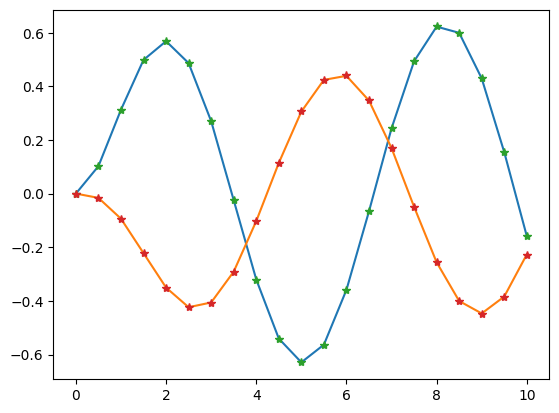

In [18]:
xy = np.array(xy)
plt.plot(t,x1y1[:,0])
plt.plot(t,x1y1[:,1])
plt.plot(t,xy, '*')
#plt.legend('x_real','y_real','x_comp','y_comp')
plt.plot()

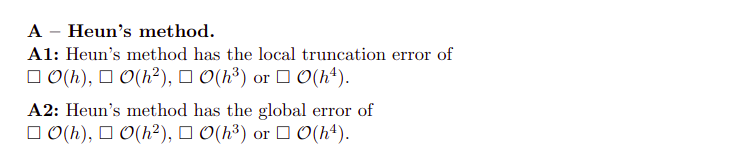

A1)O(h^3)

A2)O(h^2)

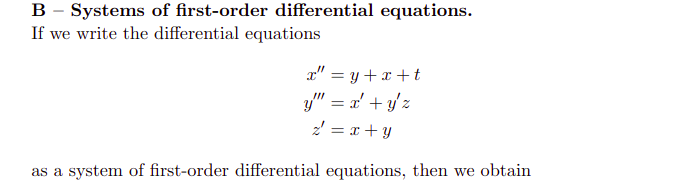

6 diff. equations

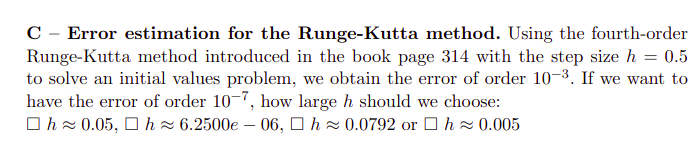

$10^{-3} = k(0.5)^4 \, \Rightarrow k = 0.016$

$10^{-7} = 0.016(h)^4 \, \Rightarrow h = 0.05$

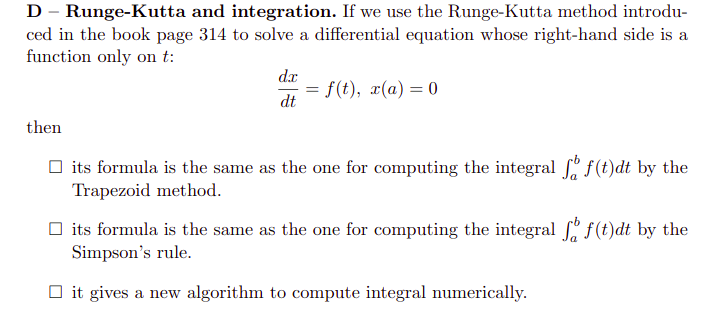

It gives new algo

## Boundry Problem

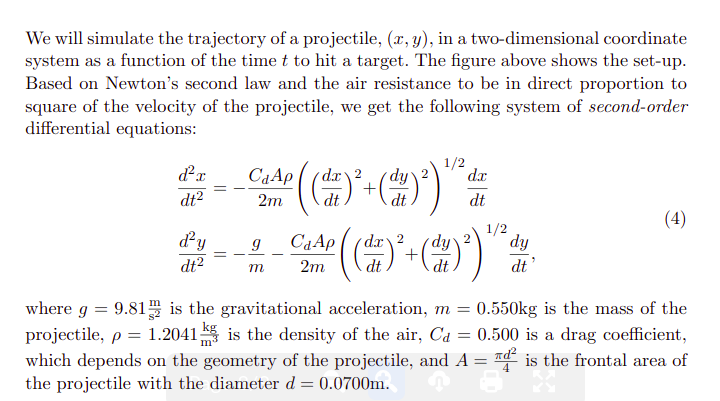

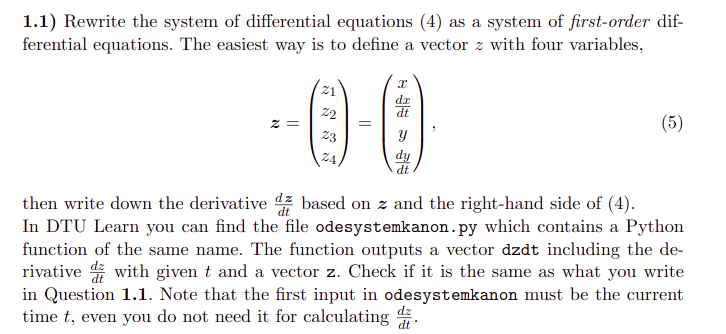

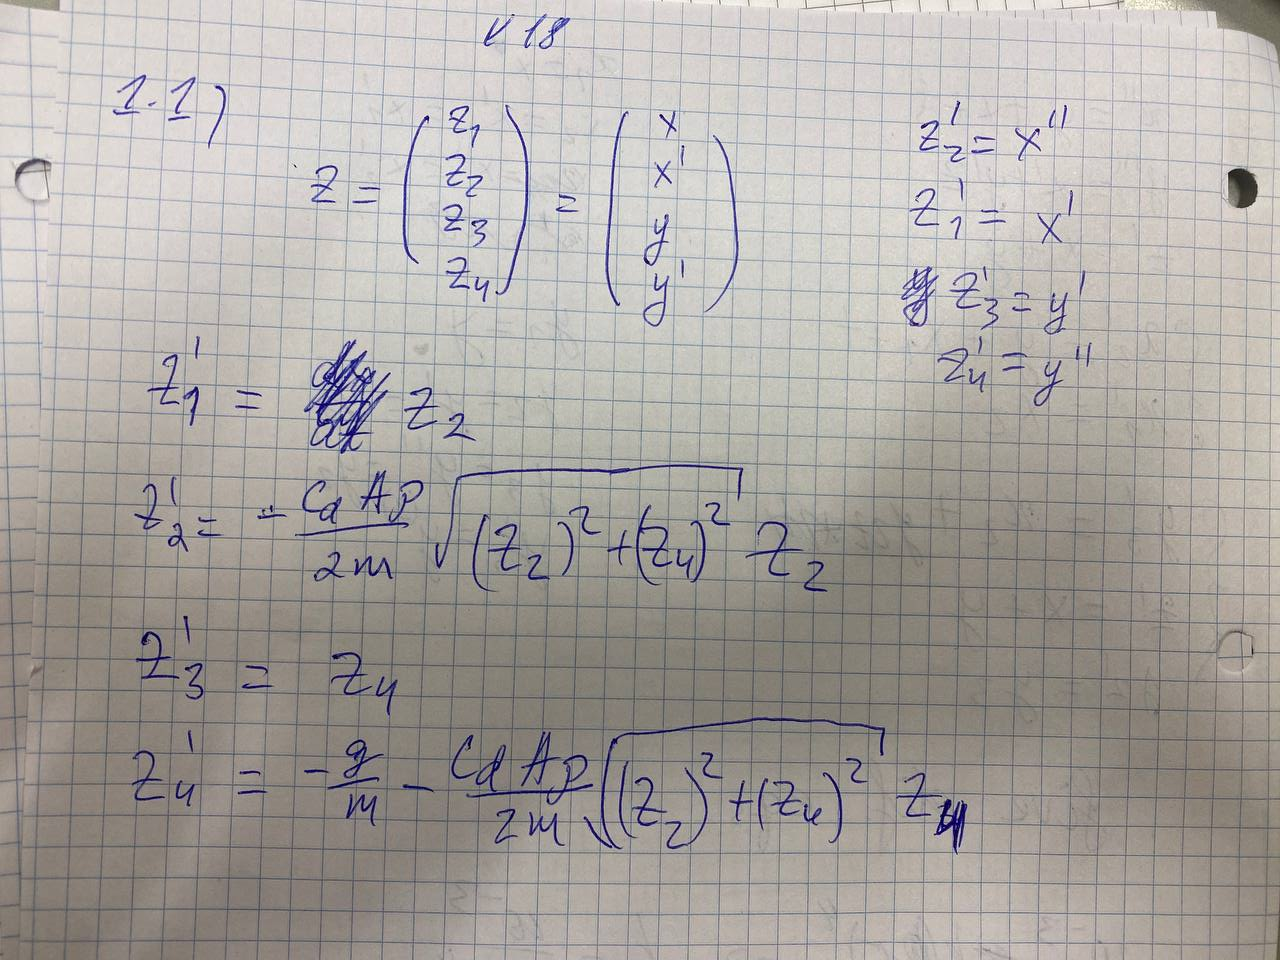

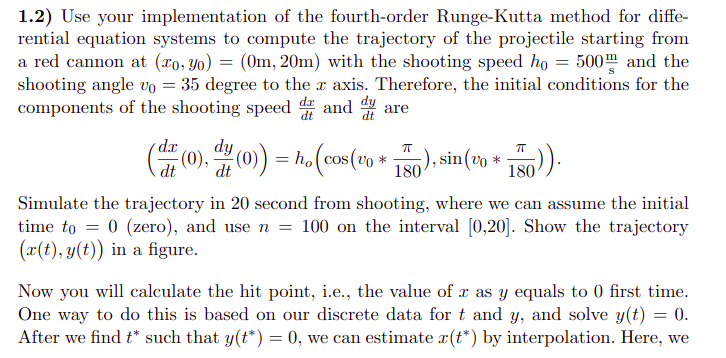
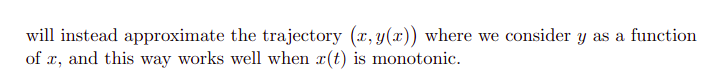

In [28]:
x0, y0 = 0, 20
h0 = 500  #shooting speed
v0 = 35 #shooting angle in degrees
z0 = np.zeros(4)
#initial speed components x and y directions
z0[1] = h0*np.cos(v0*np.pi/180)
z0[3] = h0*np.sin(v0*np.pi/180)
dzdt = odesystemkanon
n = 100
t0 = 0
t1 = 20

In [69]:
t, xy = MyRK4System(dzdt,[t0,t1],z0,n)
xy = np.array(xy)
x = xy[:,0]
y = xy[:,2]

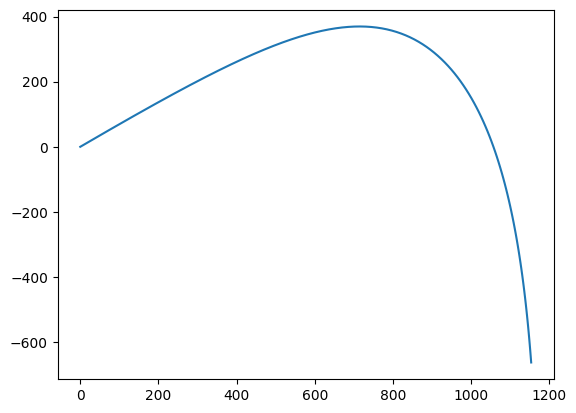

In [70]:
plt.plot(x, y)

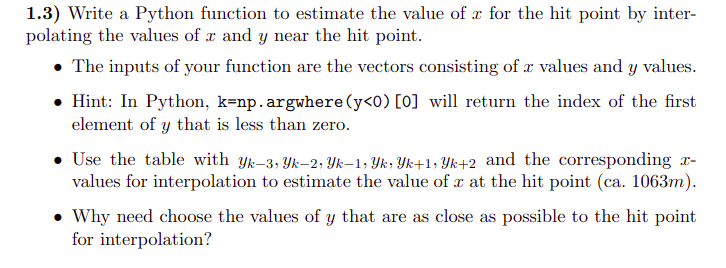

In [73]:
def CardinalPolynomial(nodes, i, t):
    cardinals = []
    #loop that calculates ith polynomial
    for arg in t: 
        l = 1
        for index in range(len(nodes)):
            if index == i: 
                continue
            else:
                l*=(arg-nodes[index])/(nodes[i]-nodes[index])
        cardinals.append(l)
    return cardinals
def InterpolerLangrangeForm(nodes, ydata, t):
    ydata = np.r_[*ydata].reshape(-1, 1)
    nodes = np.r_[*nodes]
    cardinals_matrix = []

    for i in range(len(nodes)):
        cardinals = np.array(CardinalPolynomial(nodes, i, t)).T
        cardinals_matrix.append(cardinals)

    cardinals_matrix = np.column_stack(cardinals_matrix)
    lagrange = cardinals_matrix @ ydata

    return lagrange    

In [104]:
def hitPoint(x,y):
    #-----------------------
    #This function takes trajectory points(coordinates) and interpolates the function f(x) = y, y - y coordinate, x - x coordianate.
    #-----------------------
    
    #first we find the first y < 0(its index)
    k = np.argwhere(y<0)[0][0]
    #t is the data points(x coordinates) we want to know the value of y at
    t = np.linspace(x[k-1], x[k+1], 200)
    #we will use 3 poins before the found y and 2 after for interpolation
    xdata = x[k-3 : k+2]
    ydata = y[k-3 : k+2]
    #y coordinate at t
    lagrange = InterpolerLangrangeForm(x, y, t)
    #index of the lowest absolute value of y 
    k_lag = np.argmin(np.abs(lagrange))
    return t[k_lag]

In [105]:
hitPoint(x,y)

1057.1235853107346

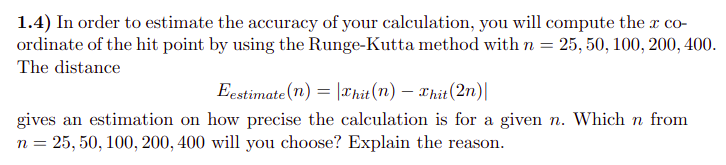

In [109]:
E = []
x_val = []
t, xy = MyRK4System(dzdt,[t0,t1],z0,25)
xy = np.array(xy)
x = xy[:,0]
y = xy[:,2]
x_prev = hitPoint(x,y)
x_val.append(x_prev)
for n in [50,100,200,400]:
    t, xy = MyRK4System(dzdt,[t0,t1],z0,n)
    xy = np.array(xy)
    x = xy[:,0]
    y = xy[:,2]
    x_est = hitPoint(x,y)
    x_val.append(x_est)
    e = np.abs(x_prev - x_est)
    E.append(e)
    x_rev = x_est
    

In [111]:
E, x_val

([11.057530279296998,
  11.32304396222662,
  11.361536503937486,
  13.348239229905175],
 [1045.800541348508,
  1056.858071627805,
  1057.1235853107346,
  1057.1620778524455,
  1059.1487805784132])

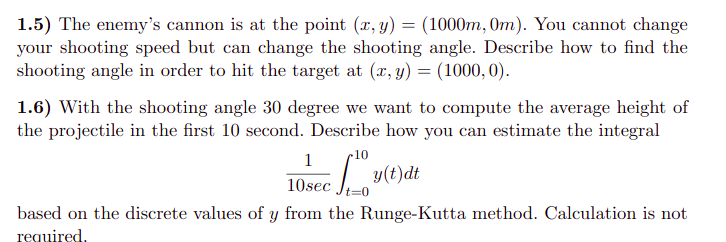

1.5) We can shoot at two different angles to get 2 points and use these values as the values of the function $\phi(\alpha)$ to get the right angle, $\phi(\alpha) - 1000= 0$. But we need to interpolate those values of the function, or even better use inverse interpolation to find the angle. 

In [ ]:
def secant(f, x0, x1, n_max):
    a = x0
    b = x1
    f_a = f(a)
    f_b = f(b)
    X = [a, b]
    for n in range(1,n_max, 1):
        d = f_b * (b-a)/(f_b - f_a)
        a = b
        f_a = f_b
        b = b - d
        f_b = f(b)
        X.append(b)
    return X

In [33]:
import numpy as np
def odesystemkanon( _ , indata ):
    """
    simultaneous second order differentials for projectile
    motion with air resistance
    output vector z has the four differential outputs
    assumed units: metres, seconds, Newtons, kg, radians
    since the first variable t is not used 
    it can be replaced by _ in the function call
    """

    g=9.81 # m/s^2
    m=550/1000 # mass of projectile, kg
    d=0.07 # diameter of spherical projectile, meters
    Cd=0.5 # assumed
    rho=1.2041 # density of air, kg/m^3
    A=(np.pi*d**2)/4 # silhouette area, m^2
    C=Cd*A*rho/2/m # the drag force constant
    z = np.zeros(4) # initialize space

    z[0] = indata[1]
    z[1] = (-C) * np.sqrt(indata[1]**2 + indata[3]**2)*indata[1]
    z[2] = indata[3]
    z[3] = (-g) + ((-C) * np.sqrt(indata[1]**2 + indata[3]**2) * indata[3])
    
    return z